In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import datasets,Sequential
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
import os

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar100.load_data()

169001437/169001437 [==============================] - 13s 0us/step


In [3]:
from sklearn.model_selection import train_test_split
X_training, X_val, y_training, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [4]:
X_training = X_training/255
X_val = X_val/255
X_test = X_test/255

In [5]:
cnn = models.Sequential([
    # Convolutional layers

    layers.Conv2D(filters=256, kernel_size=(3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Conv2D(filters=256, kernel_size=(3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),

    layers.Conv2D(filters=512, kernel_size=(3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Conv2D(filters=512, kernel_size=(3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),

    layers.Conv2D(filters=512, kernel_size=(3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Conv2D(filters=512, kernel_size=(3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),

    # Flatten and Dense layers
    layers.Flatten(),
    layers.Dense(1024, activation='relu'),
    layers.Activation('relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(100, activation='softmax')
])

In [6]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
history = cnn.fit(X_training, y_training, batch_size=16, epochs=50, validation_data=(X_val, y_val))

Epoch 1/50
2500/2500 [==============================] - 118s 41ms/step - loss: 3.8001 - accuracy: 0.1400 - val_loss: 3.3641 - val_accuracy: 0.2115
Epoch 2/50
2500/2500 [==============================] - 98s 39ms/step - loss: 2.7413 - accuracy: 0.3134 - val_loss: 2.9222 - val_accuracy: 0.2909
Epoch 3/50
2500/2500 [==============================] - 98s 39ms/step - loss: 2.2525 - accuracy: 0.4116 - val_loss: 2.3055 - val_accuracy: 0.4052
Epoch 4/50
2500/2500 [==============================] - 104s 42ms/step - loss: 1.9403 - accuracy: 0.4791 - val_loss: 2.2182 - val_accuracy: 0.4356
Epoch 5/50
2500/2500 [==============================] - 100s 40ms/step - loss: 1.6469 - accuracy: 0.5469 - val_loss: 1.9748 - val_accuracy: 0.4811
Epoch 6/50
2500/2500 [==============================] - 105s 42ms/step - loss: 1.3804 - accuracy: 0.6127 - val_loss: 1.8085 - val_accuracy: 0.5273
Epoch 7/50
2500/2500 [==============================] - 105s 42ms/step - loss: 1.1290 - accuracy: 0.6726 - val_loss: 1.8

In [8]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 6s 15ms/step - loss: 2.9800 - accuracy: 0.5794


[2.980046272277832, 0.5794000029563904]

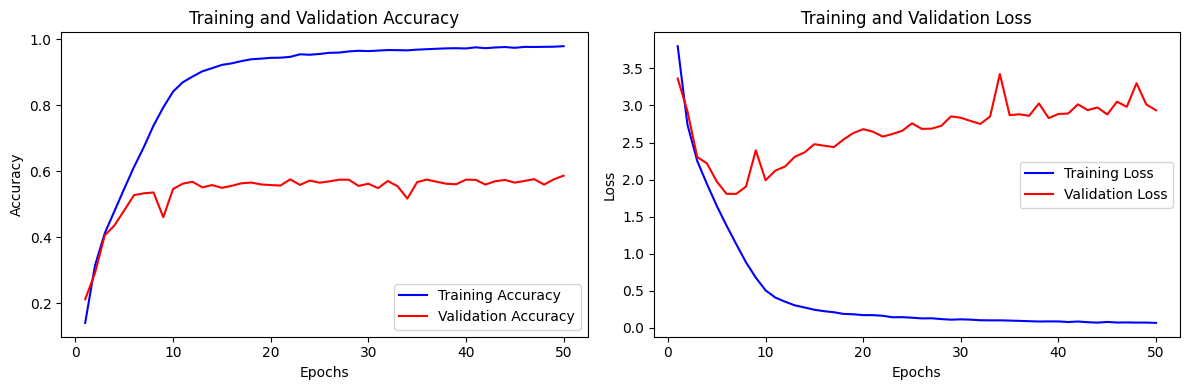

In [9]:
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Plotting accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(training_accuracy) + 1), training_accuracy, 'b', label='Training Accuracy')
plt.plot(range(1, len(validation_accuracy) + 1), validation_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(range(1, len(training_loss) + 1), training_loss, 'b', label='Training Loss')
plt.plot(range(1, len(validation_loss) + 1), validation_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

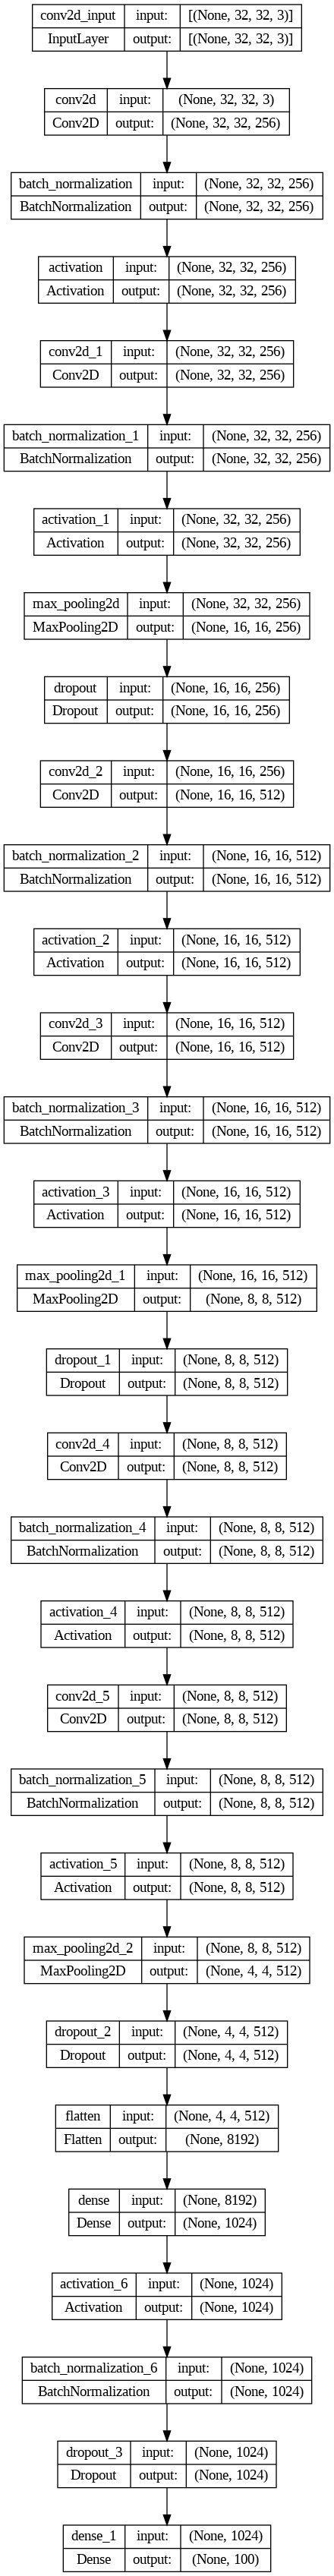

In [11]:
from keras.utils import plot_model
plot_model(cnn, to_file='conv2d_model.png', show_shapes=True, show_layer_names=True)